In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
acc = []
model = []

# Laden des Datensatzes
file_path = 'Crop_recommendation.csv'  # Stellen Sie sicher, dass sich die Datei im gleichen Verzeichnis befindet
data = pd.read_csv(file_path)

#sns.heatmap(data.corr(),annot=True)

# Features und Zielvariable definieren
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# XGBoost-Modell initialisieren und trainieren
XB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
XB.fit(X_train, y_train)

# Vorhersagen
predicted_values = XB.predict(X_test)

# Genauigkeit und Bericht
accuracy = accuracy_score(y_test, predicted_values)
print(f"XGBoost's Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, predicted_values, target_names=label_encoder.classes_))



c:\Users\zauch\Documents\GIT\cropRecommendation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\zauch\Documents\GIT\cropRecommendation\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:05:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost's Accuracy: 98.64%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14


In [2]:
print(f"X_test Shape: {X_test.shape}")
print(f"Features: {list(X.columns)}")


X_test Shape: (440, 7)
Features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

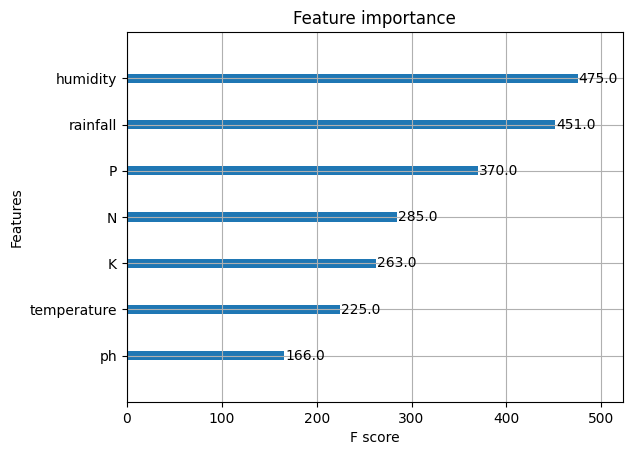

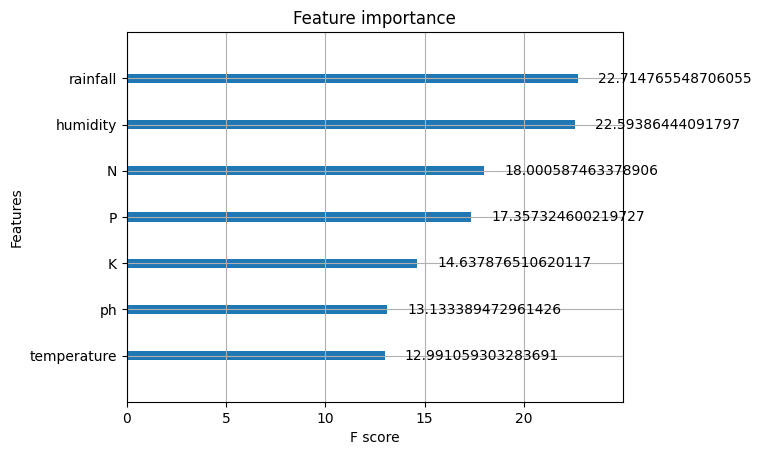

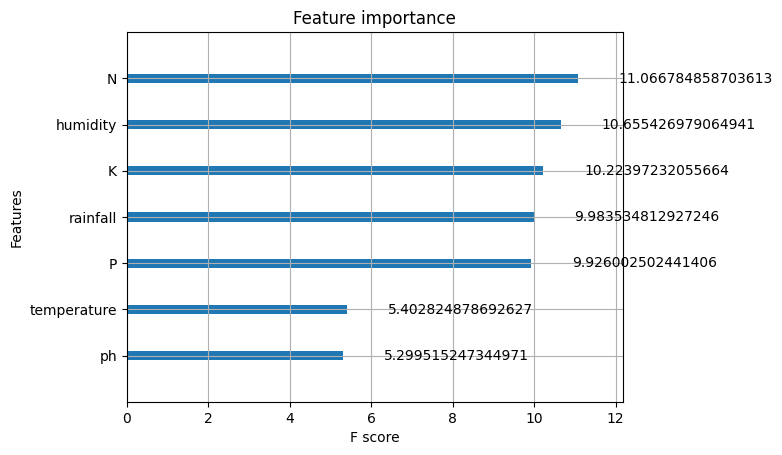

In [22]:
from xgboost import plot_importance
plot_importance(XB, importance_type='weight')

from xgboost import plot_importance
plot_importance(XB, importance_type='cover')

from xgboost import plot_importance
plot_importance(XB, importance_type='gain')


In [24]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence


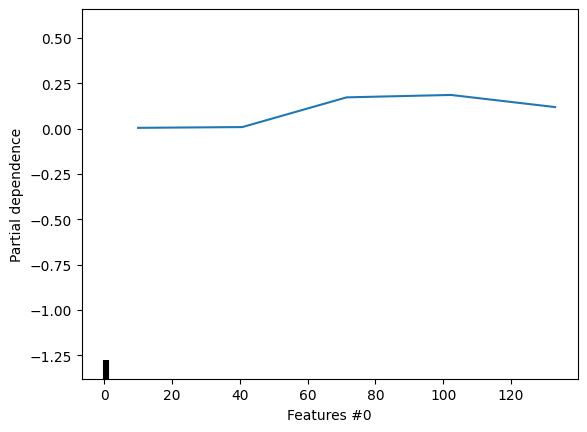

In [34]:
features, feature_names = [(0,)], [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=5)}
pd_results = partial_dependence(
    XB, X, features=1, kind="average", grid_resolution=5)

display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles)

display.plot(pdp_lim={1: (-1.38, 0.66)})
plt.show()